In [2]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import random
import os
from sklearn import svm
from sklearn.preprocessing import normalize

# Mnist Data set

Problem1 Get data

In [35]:
cwd = "/Users/Yolica/Google Drive/CS289A/hw2017/HW1"

mnist = sio.loadmat(cwd+"/hw01_data/mnist/train.mat")
#mnist_test = sio.loadmat(cwd + "/hw01_data/mnist/test.mat")
mnist = mnist['trainX'] # mnist train set
mnist_train = mnist[...,range(mnist.shape[1]-1)]
train_label = mnist[...,-1]

mnist_train = normalize(mnist_train)
samplerowT = random.sample(range(0,len(mnist_train)),50000)
samplerowF = [i for i in range(len(mnist_train)) if i not in samplerowT] 
train = mnist_train[samplerowT]
val = mnist_train[samplerowF]
label = train_label[samplerowT]
label_val = train_label[samplerowF]

trainMnist = {"train" : train,
             "label" : label}

valMnist = {"val" : val,
             "label" : label_val}


def random_split(dataset, k):
    samplerowT = random.sample(range(0,len(dataset["train"])),k)
    train_spam = dataset["train"][samplerowT]
    label_spam = dataset["label"][samplerowT]
    return({'trainset':train_spam,
            'label':label_spam})
  


Problem2(a) Calculating training sets error rate

In [53]:
example = [100, 200, 500, 1000, 2000, 5000,10000]
train_err = []
for i in example:
    train = random_split(trainMnist,i)
    #validation = np.asarray(train_mnist)
    model = svm.SVC(kernel="linear").fit(train['trainset'],train['label'])
    acc = model.score(train['trainset'],train['label'])
    train_err.append(acc)
    print('Sample size is', i, ';', 'Accuracy is', acc)
print(train_err)



Sample size is 100 ; Accuracy is 0.93
Sample size is 200 ; Accuracy is 0.94
Sample size is 500 ; Accuracy is 0.95
Sample size is 1000 ; Accuracy is 0.946
Sample size is 2000 ; Accuracy is 0.9425
Sample size is 5000 ; Accuracy is 0.9476
Sample size is 10000 ; Accuracy is 0.9472
[0.93000000000000005, 0.93999999999999995, 0.94999999999999996, 0.94599999999999995, 0.9425, 0.9476, 0.94720000000000004]


Problem2(b) Calculating validation sets error rate

In [57]:
example = [100, 200, 500, 1000, 2000, 5000,10000]
val_err = []
for i in example:
    train = random_split(trainMnist,i)
    #train = random_split(trainMnist,i)
    #validation = np.asarray(validation_mnist)
    model = svm.SVC(kernel="linear").fit(train['trainset'],train['label'])
    acc = model.score(val,label_val)
    print('Sample size is', i, ';', 'Accuracy is', acc)
    val_err.append(acc)
print(val_err)

Sample size is 100 ; Accuracy is 0.6621
Sample size is 200 ; Accuracy is 0.7839
Sample size is 500 ; Accuracy is 0.8627
Sample size is 1000 ; Accuracy is 0.8924
Sample size is 2000 ; Accuracy is 0.9081
Sample size is 5000 ; Accuracy is 0.9207
Sample size is 10000 ; Accuracy is 0.9291
[0.66210000000000002, 0.78390000000000004, 0.86270000000000002, 0.89239999999999997, 0.90810000000000002, 0.92069999999999996, 0.92910000000000004]


Plot two kind of error rate in one figure

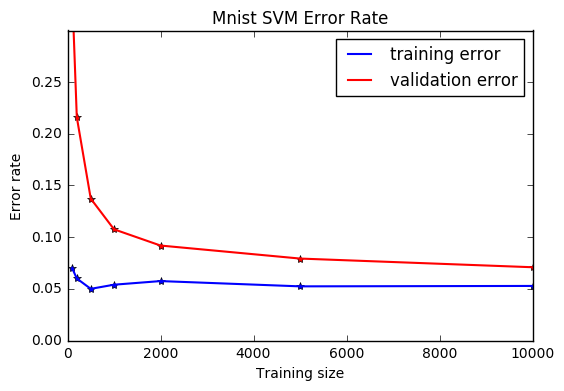

In [72]:
plt.plot(example,[1-a for a in train_err] ,'b*',color="blue")
plt.plot(example,[1-a for a in train_err] ,'r-',color="blue", linewidth=1.5, label = "training error")

plt.plot(example,[1-a for a in val_err], 'b*',color="red")
plt.plot(example,[1-a for a in val_err],'r' ,color="red", linewidth=1.5, label = "validation error")
plt.xlabel("Training size")
plt.ylabel("Error rate")
plt.title("Mnist SVM Error Rate")
plt.legend(loc = "upper right")

plt.ylim(0,0.3)
plt.savefig("MnistLC.png",dpi=72)
plt.show()

Problem3 Hyperparameter tuning

In [66]:
train = random_split(trainMnist,10000)
#validation = random_split(validation_mnist,10000)
C = [1,3,10,30,100,300,1000]
C_acc_mnist = []
for i in C:
    model = svm.SVC(C = i, kernel="linear").fit(train['trainset'],train['label'])
    acc = model.score(val,label_val)
    print('C is', i, ';', 'Accuracy is', acc)
    C_acc_mnist.append(acc)
print(C_acc_mnist)
C_opt = C[C_acc_mnist.index(max(C_acc_mnist))]


C is 1 ; Accuracy is 0.9285
C is 3 ; Accuracy is 0.9304
C is 10 ; Accuracy is 0.9301
C is 30 ; Accuracy is 0.9204
C is 100 ; Accuracy is 0.9144
C is 300 ; Accuracy is 0.9097
C is 1000 ; Accuracy is 0.9088
[0.92849999999999999, 0.9304, 0.93010000000000004, 0.9204, 0.91439999999999999, 0.90969999999999995, 0.90880000000000005]


In [67]:
print('The best C is',C_opt, ";", "the corresponding accuracy is", max(C_acc_mnist))

The best C is 3 ; the corresponding accuracy is 0.9304


Problem5 Prediction 

In [68]:
mnist_test = sio.loadmat(cwd + "/hw01_data/mnist/test.mat")
test_mnist = mnist_test['testX']
test_mnist = normalize(test_mnist)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


In [70]:
model = svm.SVC(C = C_opt, kernel="linear").fit(mnist_train,train_label)
result = model.predict(test_mnist)

In [71]:
np.savetxt('prediction_mnist.csv', result, delimiter = ',')